In [2]:
# Import necessary libraries
from unicodedata import mirrored
import aotools as ao
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [3]:
z = [1, 2, 3]
z[1:np.size(z)]

[2, 3]

In [12]:
# Function to generate laguerre polynomials
def laguerre_pol(l, p, x):
    if p == 0:
        return 1
    elif p == 1:
        return 1 - x + l
    else:
        return (2*p + l - 1 - x)*laguerre_pol(l, p - 1, x)/p - (p + l - 1)*laguerre_pol(l, p - 2, x)/p

In [45]:
# Function that calculates the radial profile of a Laguerre-Gaussian beam
def lag_gaus_beam(wvl, w0, l, p, z, r):

    k = 2*np.pi/wvl; # Optical wavenumber
    zR = np.pi*(w0**2)/wvl; # Rayleigh range
    w = w0*np.sqrt(1 + (z/zR)**2); # Beam-waist radius at distance z

    # Calculate generalized Laguerre polynomial of order zero
    Lpl = laguerre_pol(l, p, 2*(r**2)/(w**2))
    #Calculate the radial profile
    Rpl = 2*np.sqrt(m.factorial(p)/m.factorial(p+abs(l)))*(1/w)*((r*np.sqrt(2)/w)**abs(l))*np.exp(-(r**2)/(w**2))*Lpl*np.exp(1j*k*(r**2)*z/(2*(z**2 + zR**2)))*np.exp(-1j*(2*p+abs(l)+1)*np.arctan2(z, zR))

    return Rpl

In [14]:
# Function that calculates the form of an Orbital Angular Momentum (OAM)
# eigenstate based on the radial profile of a Laguerre-Gaussian (LG) beam
def oam_eigenstate(wvl, w0, l, p, z, r, theta):

    Rpl = lag_gaus_beam(wvl, w0, l, p, z, r) # Radial profile of LG beam
    phi_pl = np.exp(1j*l*theta)*Rpl/np.sqrt(2*np.pi) # OAM eigenstate

    return phi_pl

In [63]:
# Define parameters
wvl = 1550*10**(-9)
delta_in = 0.01
delta_out = 0.02 
z = 10*10**(3) # Propagation distance
w0 = 15*10**(-2); # Beamwaist radius
l = 1 
p = 0
N = 256

In [64]:
coos_in = delta_in*np.arange(-N/2, N/2 - 1)
x_in, y_in = np.meshgrid(coos_in, coos_in)
theta_in = np.arctan2(y_in, x_in)
r_in = np.sqrt(x_in**2 + y_in**2)

In [65]:
Uin = oam_eigenstate(wvl, w0, l, p, 0, r_in, theta_in)

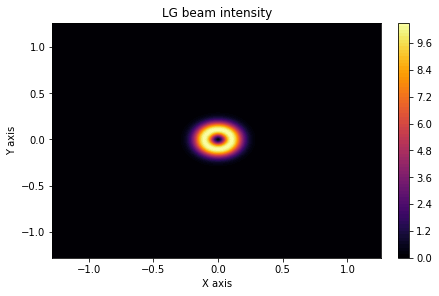

In [66]:
fig, ax = plt.subplots(constrained_layout=True)

# plots filled contour plot
c_plot = ax.contourf(x_in, y_in, abs(Uin**2), 100, cmap = plt.cm.inferno)
cbar = fig.colorbar(c_plot)

ax.set_title('LG beam intensity')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
# plt.xlim(coos_in[0], coos_in[-1])
# plt.ylim(coos_in[0], coos_in[-1])

plt.show()